# Titanic: Machine Learning from Disaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Train Data Wrangling

### Overview

In [2]:
train = pd.read_csv("./dataset/train.csv")

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Suvived

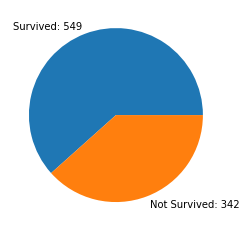

In [3]:
train_survived = train[train['Survived'] == 0].shape[0]
train_not_survived = train[train['Survived'] == 1].shape[0]

plt.pie([train_survived, train_not_survived], labels=['Survived: ' + str(train_survived), 'Not Survived: ' + str(train_not_survived)])

plt.show()

### Pclass

There are three different values of this field in train data.

In [4]:
pd.DataFrame({ 'PClass': train.Pclass.unique()})

,PClass
0,3
1,1
2,2


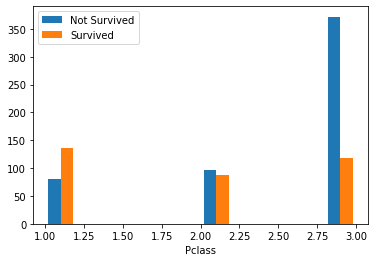

In [5]:
ax = plt.subplot()

ax.hist([train[train.Survived == 0].Pclass, train[train.Survived == 1].Pclass], label=['Not Survived', 'Survived'])

ax.legend()

ax.set_xlabel('Pclass')

plt.show()

It it pretty clear that people with `Pclass = 1` have more possibility to survive. So we keep this feature `Pclass`.

### Name

First, vectorize the names.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

name_vectorizer = CountVectorizer()

X = name_vectorizer.fit_transform(train.Name)

We got a sort of words.

In [7]:
pd.DataFrame({ 'name': name_vectorizer.get_feature_names() })

,name
0,aaron
1,abbing
2,abbott
3,abelson
4,abraham
...,...
1504,zabour
1505,zebley
1506,zenni
1507,zillah


And a matrix of features.

In [8]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Use k-means to cluster these features.

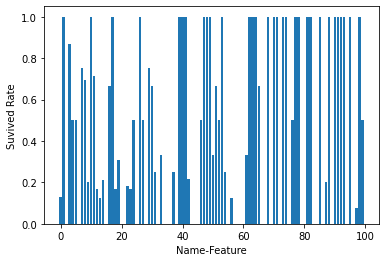

In [9]:
from sklearn.cluster import KMeans

n_clusters = 500

name_cls = KMeans(n_clusters = n_clusters)

name_cls.fit(X)

train['Name-Feature'] = name_cls.predict(X)

ax = plt.subplot()

ax.bar(range(0, 100), [train[(train['Name-Feature'] == i) & (train['Survived'] == 1)].shape[0] / (train[train['Name-Feature'] == i].shape[0]) for i in range(0, 100)])

ax.set_ylabel('Suvived Rate')
ax.set_xlabel('Name-Feature')

plt.show()

At least we have a distribution of survied rate under different clusters. So we keep this generated field `Name-Feature`.

### Sex

There are two kinds of values of field `Sex` in train data.

In [10]:
pd.DataFrame({ 'Sex': train.Sex.unique() })

,Sex
0,male
1,female


Categorize the field `Sex`.

In [11]:
train.loc[train.Sex == 'male', 'Male'] = 1
train.loc[train.Sex == 'female', 'Male'] = 0

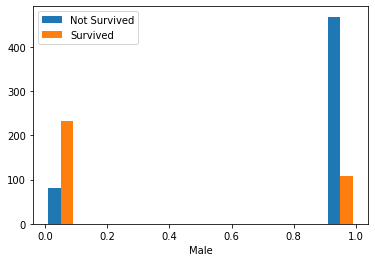

In [12]:
ax = plt.subplot()

ax.hist([train[train.Survived == 0].Male, train[train.Survived == 1].Male], label=['Not Survived', 'Survived'])

ax.legend()

ax.set_xlabel('Male')

plt.show()

It is pretty clear that **females have more possibility to survive than males**. So we keep this field `Sex`.

### Age

The fields `Age` of some train instances are missed.

In [13]:
pd.DataFrame({ 'Age': train.Age.unique() })

,Age
0,22.00
1,38.00
2,26.00
3,35.00
4,NaN
...,...
84,0.67
85,30.50
86,0.42
87,34.50


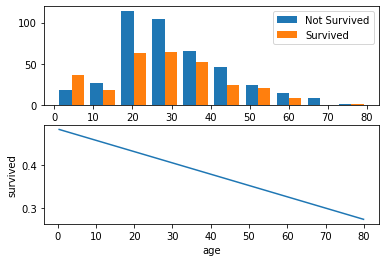

array([-0.00261254])

In [14]:
from sklearn.linear_model import LinearRegression

train_with_age = train[train.Age.notna()]

fig, axes = plt.subplots(2)

axes[0].hist([train_with_age[train_with_age.Survived == 0].Age, train_with_age[train_with_age.Survived == 1].Age], label=['Not Survived', 'Survived'])

axes[0].legend()

axes[0].set_xlabel('Age')

reg = LinearRegression()

reg.fit(np.array(train_with_age.Age).reshape(-1, 1), train_with_age.Survived)

X = np.arange(train_with_age.Age.min(), train_with_age.Age.max(), 0.1)
Y = reg.predict(X.reshape(-1, 1))

axes[1].plot(X, Y)

axes[1].set_xlabel('age')
axes[1].set_ylabel('survived')

plt.show()

reg.coef_

In general, with increasing age, the survived rate shows a downward trend. So we keep this field `Age`.

And for the missing value of `Age`, we choose to use field `Pclass` to predict for a suitable value.

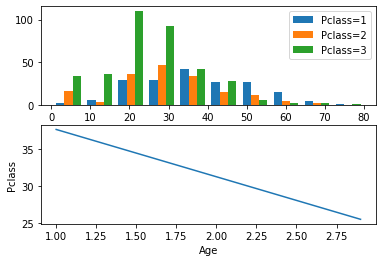

In [15]:
from sklearn.linear_model import LinearRegression

train_with_age = train[train.Age.notna()]

fig, axes = plt.subplots(2)

axes[0].hist([
  train_with_age[train_with_age.Pclass == 1].Age,
  train_with_age[train_with_age.Pclass == 2].Age,
  train_with_age[train_with_age.Pclass == 3].Age], label=['Pclass=1', 'Pclass=2', 'Pclass=3'])

axes[0].legend()

axes[0].set_xlabel('Age')

reg_age = LinearRegression()

reg_age.fit(np.array(train_with_age.Pclass).reshape(-1, 1), train_with_age.Age)

X = np.arange(train_with_age.Pclass.min(), train_with_age.Pclass.max(), 0.1)
Y = reg_age.predict(X.reshape(-1, 1))

axes[1].plot(X, Y)

axes[1].set_xlabel('Age')
axes[1].set_ylabel('Pclass')


plt.show()

In [16]:
if train[train.Age.isna()].shape[0] > 0:
  train.loc[train.Age.isna(), 'Age'] = reg_age.predict(np.array(train[train.Age.isna()].Pclass).reshape(-1, 1)).tolist()

### SibSp

The field `SibSp` indicates the number of family members aboard the Titanic. Thre are 7 possible values of the field `SibSp`.

In [17]:
pd.DataFrame({ 'SibSp': train.SibSp.unique() })

,SibSp
0,1
1,0
2,3
3,4
4,2
5,5
6,8


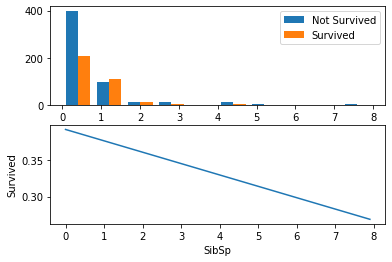

In [18]:
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(2)

axes[0].hist([
  train[train.Survived == 0].SibSp,
  train[train.Survived == 1].SibSp], label=['Not Survived', 'Survived'])

axes[0].legend()

axes[0].set_xlabel('SibSp')

reg = LinearRegression()

reg.fit(np.array(train.SibSp).reshape(-1, 1), train.Survived)

X = np.arange(train.SibSp.min(), train.SibSp.max(), 0.1)
Y = reg.predict(X.reshape(-1, 1))

axes[1].plot(X, Y)

axes[1].set_xlabel('SibSp')
axes[1].set_ylabel('Survived')


plt.show()

It seems that with increasing number of siblings, the survied rate is reduced. So we keep this field `SibSp`.

### Parch

The field `Parch` indicates the number of parents or children aboard the Titanic. There are also 7 possible values of this field.

In [19]:
pd.DataFrame({ 'Parch': train.Parch.unique() })

,Parch
0,0
1,1
2,2
3,5
4,3
5,4
6,6


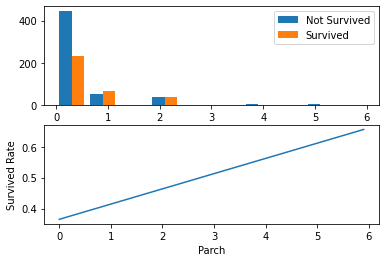

In [20]:
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(2)

axes[0].hist([
  train[train.Survived == 0].Parch,
  train[train.Survived == 1].Parch], label=['Not Survived', 'Survived'])

axes[0].legend()

axes[0].set_xlabel('Parch')

reg = LinearRegression()

reg.fit(np.array(train.Parch).reshape(-1, 1), train.Survived)

X = np.arange(train.Parch.min(), train.Parch.max(), 0.1)
Y = reg.predict(X.reshape(-1, 1))

axes[1].plot(X, Y)

axes[1].set_xlabel('Parch')
axes[1].set_ylabel('Survived Rate')


plt.show()

It seems that with increasing number of `Parch`, the survied rate is reduced. So we keep this field `Parch`.

### Ticket

The field `Ticket` is the ticket number.

In [21]:
pd.DataFrame({ 'Ticket': train.Ticket.unique() })

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
676,SOTON/OQ 392076
677,211536
678,112053
679,111369


Vectorize this field and use k-means to generate a feature called `Ticket-Feature`.

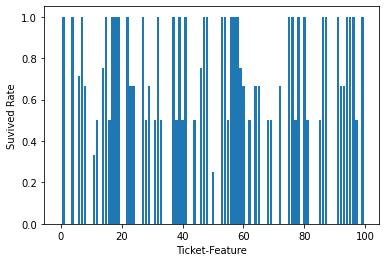

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

ticket_vectorizer = CountVectorizer()

X = ticket_vectorizer.fit_transform(train.Ticket)

n_clusters = 500

ticket_cls = KMeans(n_clusters = n_clusters)

ticket_cls.fit(X)

train['Ticket-Feature'] = ticket_cls.predict(X)

ax = plt.subplot()

ax.bar(range(0, 100), [train[(train['Ticket-Feature'] == i) & (train['Survived'] == 1)].shape[0] / (train[train['Ticket-Feature'] == i].shape[0]) for i in range(0, 100)])

ax.set_ylabel('Suvived Rate')
ax.set_xlabel('Ticket-Feature')

plt.show()

At least we have a distribution of survied rate under different clusters. So we keep this generated field `Ticket-Feature`.

### Fare

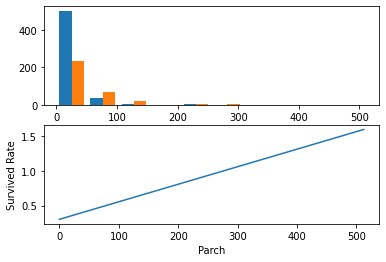

In [23]:
fig, axes = plt.subplots(2)

axes[0].hist([
  train[train.Survived == 0].Fare,
  train[train.Survived == 1].Fare], label=['Not Survived', 'Survived'])

axes[0].set_xlabel('Fare')

reg = LinearRegression()

reg.fit(np.array(train.Fare).reshape(-1, 1), train.Survived)

X = np.arange(train.Fare.min(), train.Fare.max(), 0.1)
Y = reg.predict(X.reshape(-1, 1))

axes[1].plot(X, Y)

axes[1].set_xlabel('Parch')
axes[1].set_ylabel('Survived Rate')

plt.show()

### Cabin

Convert the field `Cabin` to `A-Z, -` and categorize.

In [24]:
for i in range(ord('A'), ord('Z') + 1):
    train.loc[train.Cabin.notna() & train.Cabin.str.contains(chr(i)), 'Cabin'] = chr(i)

for i in range(ord('A'), ord('Z') + 1):
    train.loc[train.Cabin == chr(i), 'Cabin'] = i - ord('A')
    
if train[train.Cabin.isna()].shape[0] > 0:
    train.loc[train.Cabin.isna(), 'Cabin'] = -1

In [25]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name-Feature,Male,Ticket-Feature
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,-1,S,347,1.0,216
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,2,C,124,0.0,227
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,-1,S,327,0.0,167
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,2,S,106,0.0,33
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,-1,S,9,1.0,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,-1,S,32,1.0,435
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S,208,0.0,216
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.815091,1,2,W./C. 6607,23.4500,-1,S,360,0.0,70
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,2,C,446,1.0,141


### Embarked

The field `Embarked` indicates the place people aboard the Titanic. Some of them are missed.

In [26]:
pd.DataFrame({ 'Embarked': train.Embarked.unique() })

,Embarked
0,S
1,C
2,Q
3,NaN


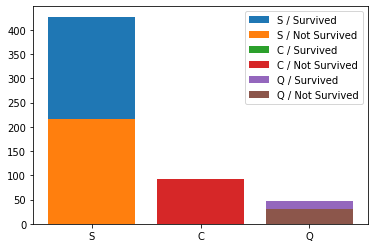

In [27]:
t = train[train.notna()]

for label in train.Embarked.unique():
    if not pd.isna(label):
        plt.bar(label, t[(t.Survived == 0) & (t.Embarked == label)].shape[0], label = label + ' / Survived')
        plt.bar(label, t[(t.Survived == 1) & (t.Embarked == label)].shape[0], label = label + ' / Not Survived')
    
plt.legend()

plt.show()

In [28]:
train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name-Feature,Male,Ticket-Feature
Embarked,,,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644,644,644,644,644


Since the value `S` is the most common one, we choose `S` to fill in missied values.

In [29]:
train.loc[train.Embarked.isna(), 'Embarked'] = 'S'

And also, categorize this field.

In [30]:
train.loc[train.Embarked == 'C', 'Embarked'] = 0
train.loc[train.Embarked == 'Q', 'Embarked'] = 1
train.loc[train.Embarked == 'S', 'Embarked'] = 2

### Wrangled Train Data

Now, select choosen fields.

In [85]:
train_x = train[['Pclass', 'Name-Feature', 'Male', 'Age', 'SibSp', 'Parch', 'Ticket-Feature', 'Fare', 'Cabin', 'Embarked']]
train_y = train.Survived

train_x

,Pclass,Name-Feature,Male,Age,SibSp,Parch,Ticket-Feature,Fare,Cabin,Embarked
0,3,347,1.0,22.000000,1,0,216,7.2500,-1,2
1,1,124,0.0,38.000000,1,0,227,71.2833,2,0
2,3,327,0.0,26.000000,0,0,167,7.9250,-1,2
3,1,106,0.0,35.000000,1,0,33,53.1000,2,2
4,3,9,1.0,35.000000,0,0,216,8.0500,-1,2
...,...,...,...,...,...,...,...,...,...,...
886,2,32,1.0,27.000000,0,0,435,13.0000,-1,2
887,1,208,0.0,19.000000,0,0,216,30.0000,1,2
888,3,360,0.0,24.815091,1,2,70,23.4500,-1,2
889,1,446,1.0,26.000000,0,0,141,30.0000,2,0


## Test Data Wrangling

### Overview

In [32]:
test = pd.read_csv('./dataset/test.csv')

test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Pclass

No missed values.

In [33]:
pd.DataFrame({ 'Pclass': test.Pclass.unique() })

,Pclass
0,3
1,2
2,1


### Name

Vectorize and cluster.

In [34]:
X = name_vectorizer.transform(test.Name)

test['Name-Feature'] = name_cls.predict(X)

### Sex

No missed values.

In [35]:
pd.DataFrame({ 'Sex': test.Sex.unique() })

,Sex
0,male
1,female


Categorize.

In [36]:
test.loc[test.Sex == 'male', 'Male'] = 1
test.loc[test.Sex == 'female', 'Male'] = 0

### Age

Use the field `Pclass` to predict missed values.

In [37]:
if test[test.Age.isna()].shape[0] > 0:
  test.loc[test.Age.isna(), 'Age'] = reg_age.predict(np.array(test[test.Age.isna()].Pclass).reshape(-1, 1)).tolist()

### SibSp

In [38]:
pd.DataFrame({ 'SibSp': test.SibSp.unique() })

,SibSp
0,0
1,1
2,2
3,3
4,4
5,5
6,8


### Parch

In [39]:
pd.DataFrame({ 'Parch': test.Parch.unique() })

,Parch
0,0
1,1
2,3
3,2
4,4
5,6
6,5
7,9


### Ticket

Vectorize and cluster.

In [40]:
X = ticket_vectorizer.transform(test.Ticket)

test['Ticket-Feature'] = ticket_cls.predict(X)

### Fare

Fill missed values with mean.

In [41]:
if test[test.Fare.isna()].shape[0] > 0:
   test.loc[test.Fare.isna(), 'Fare'] = test.Fare.mean()

### Cabin

Convert the field `Cabin` to `A-Z, -` and categorize.

In [42]:
for i in range(ord('A'), ord('Z') + 1):
    test.loc[test.Cabin.notna() & test.Cabin.str.contains(chr(i)), 'Cabin'] = chr(i)

for i in range(ord('A'), ord('Z') + 1):
    test.loc[test.Cabin == chr(i), 'Cabin'] = i - ord('A')
    
if test[test.Cabin.isna()].shape[0] > 0:
    test.loc[test.Cabin.isna(), 'Cabin'] = -1

### Embarked

No missed values.

In [43]:
test.groupby('Embarked').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name-Feature,Male,Ticket-Feature
Embarked,,,,,,,,,,,,,
C,102,102,102,102,102,102,102,102,102,102,102,102,102
Q,46,46,46,46,46,46,46,46,46,46,46,46,46
S,270,270,270,270,270,270,270,270,270,270,270,270,270


Categorize.

In [44]:
test.loc[test.Embarked == 'C', 'Embarked'] = 0
test.loc[test.Embarked == 'Q', 'Embarked'] = 1
test.loc[test.Embarked == 'S', 'Embarked'] = 2

### Wrangled Test Data.

Select choosen fields only and normalize.

In [86]:
test_x = test[['Pclass', 'Name-Feature', 'Male', 'Age', 'SibSp', 'Parch', 'Ticket-Feature', 'Fare', 'Cabin', 'Embarked']]

test_x

,Pclass,Name-Feature,Male,Age,SibSp,Parch,Ticket-Feature,Fare,Cabin,Embarked
0,3,97,1.0,34.500000,0,0,216,7.8292,-1,1
1,3,1,0.0,47.000000,1,0,216,7.0000,-1,2
2,2,69,1.0,62.000000,0,0,216,9.6875,-1,1
3,3,37,1.0,27.000000,0,0,216,8.6625,-1,2
4,3,1,0.0,22.000000,1,1,80,12.2875,-1,2
...,...,...,...,...,...,...,...,...,...,...
413,3,0,1.0,24.815091,0,0,216,8.0500,-1,2
414,1,0,0.0,39.000000,0,0,28,108.9000,2,0
415,3,0,1.0,38.500000,0,0,17,7.2500,-1,2
416,3,33,1.0,24.815091,0,0,216,8.0500,-1,2


## Multi-Layer Perceptron

Now, we use **Random Forest** to learn a model from the train data and predict.

In [97]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(train_x, train_y)

test_y = clf.predict(test_x)

prediction = pd.DataFrame({ 'PassengerId': test.PassengerId, 'Survived': test_y })

prediction

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Save Result

In [98]:
prediction.to_csv("./dataset/submission.csv", index = False)